In [1]:
import pandas as pd

# Assuming you've already loaded these DataFrames or you can load them from CSVs directly
df_gidnet = pd.read_csv('data_cutqc_supremacy_cct/GidNET_v02_width_and_runtime_cutqc_supremacy_cct_data.csv')
df_qnet = pd.read_csv('data_cutqc_supremacy_cct/QNET_width_and_runtime_cutqc_supremacy_cct_data.csv')
df_qiskit = pd.read_csv('data_cutqc_supremacy_cct/Qiskit_width_and_runtime_cutqc_supremacy_cct_data.csv')

# Merging the DataFrames on 'Circuit Sizes'
df_combined = pd.merge(df_gidnet, df_qnet, on='Circuit Sizes', how='outer', suffixes=('_gidnet', '_qnet'))
df_combined = pd.merge(df_combined, df_qiskit, on='Circuit Sizes', how='outer', suffixes=('', '_qiskit'))

# Save the combined DataFrame to CSV
df_combined.to_csv('data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv', index=False)

In [2]:
df_combined

,Circuit Sizes,GidNET Average Runtime,GidNET Stdev Runtime,GidNET Width,QNET Average Runtime,QNET Stdev Runtime,QNET Width,Qiskit Average Runtime,Qiskit Stdev Runtime,Qiskit Width
0,16,0.054118,0.001662,8,0.232042,0.020646,8,0.034403,0.000699,11
1,20,0.087888,0.001434,9,0.644203,0.032511,9,0.047088,0.001515,14
2,25,0.163495,0.005500,10,1.913570,0.034046,9,0.063693,0.002517,16
3,30,0.261959,0.007779,11,4.442569,0.116289,12,0.078211,0.001687,21
4,36,0.502674,0.014305,12,10.344221,0.343988,11,0.102692,0.006834,22
5,42,0.880157,0.042355,12,24.005156,1.056985,13,0.123056,0.004165,27
6,49,1.358781,0.072060,14,43.060713,1.047464,14,0.155348,0.008213,33
7,56,1.928320,0.111255,15,74.570417,3.272120,19,0.182108,0.003301,40
8,64,3.486160,0.055450,18,146.020070,1.985528,19,0.218533,0.007662,45
9,72,5.015760,0.268074,18,270.305784,4.202904,20,0.266496,0.015780,51


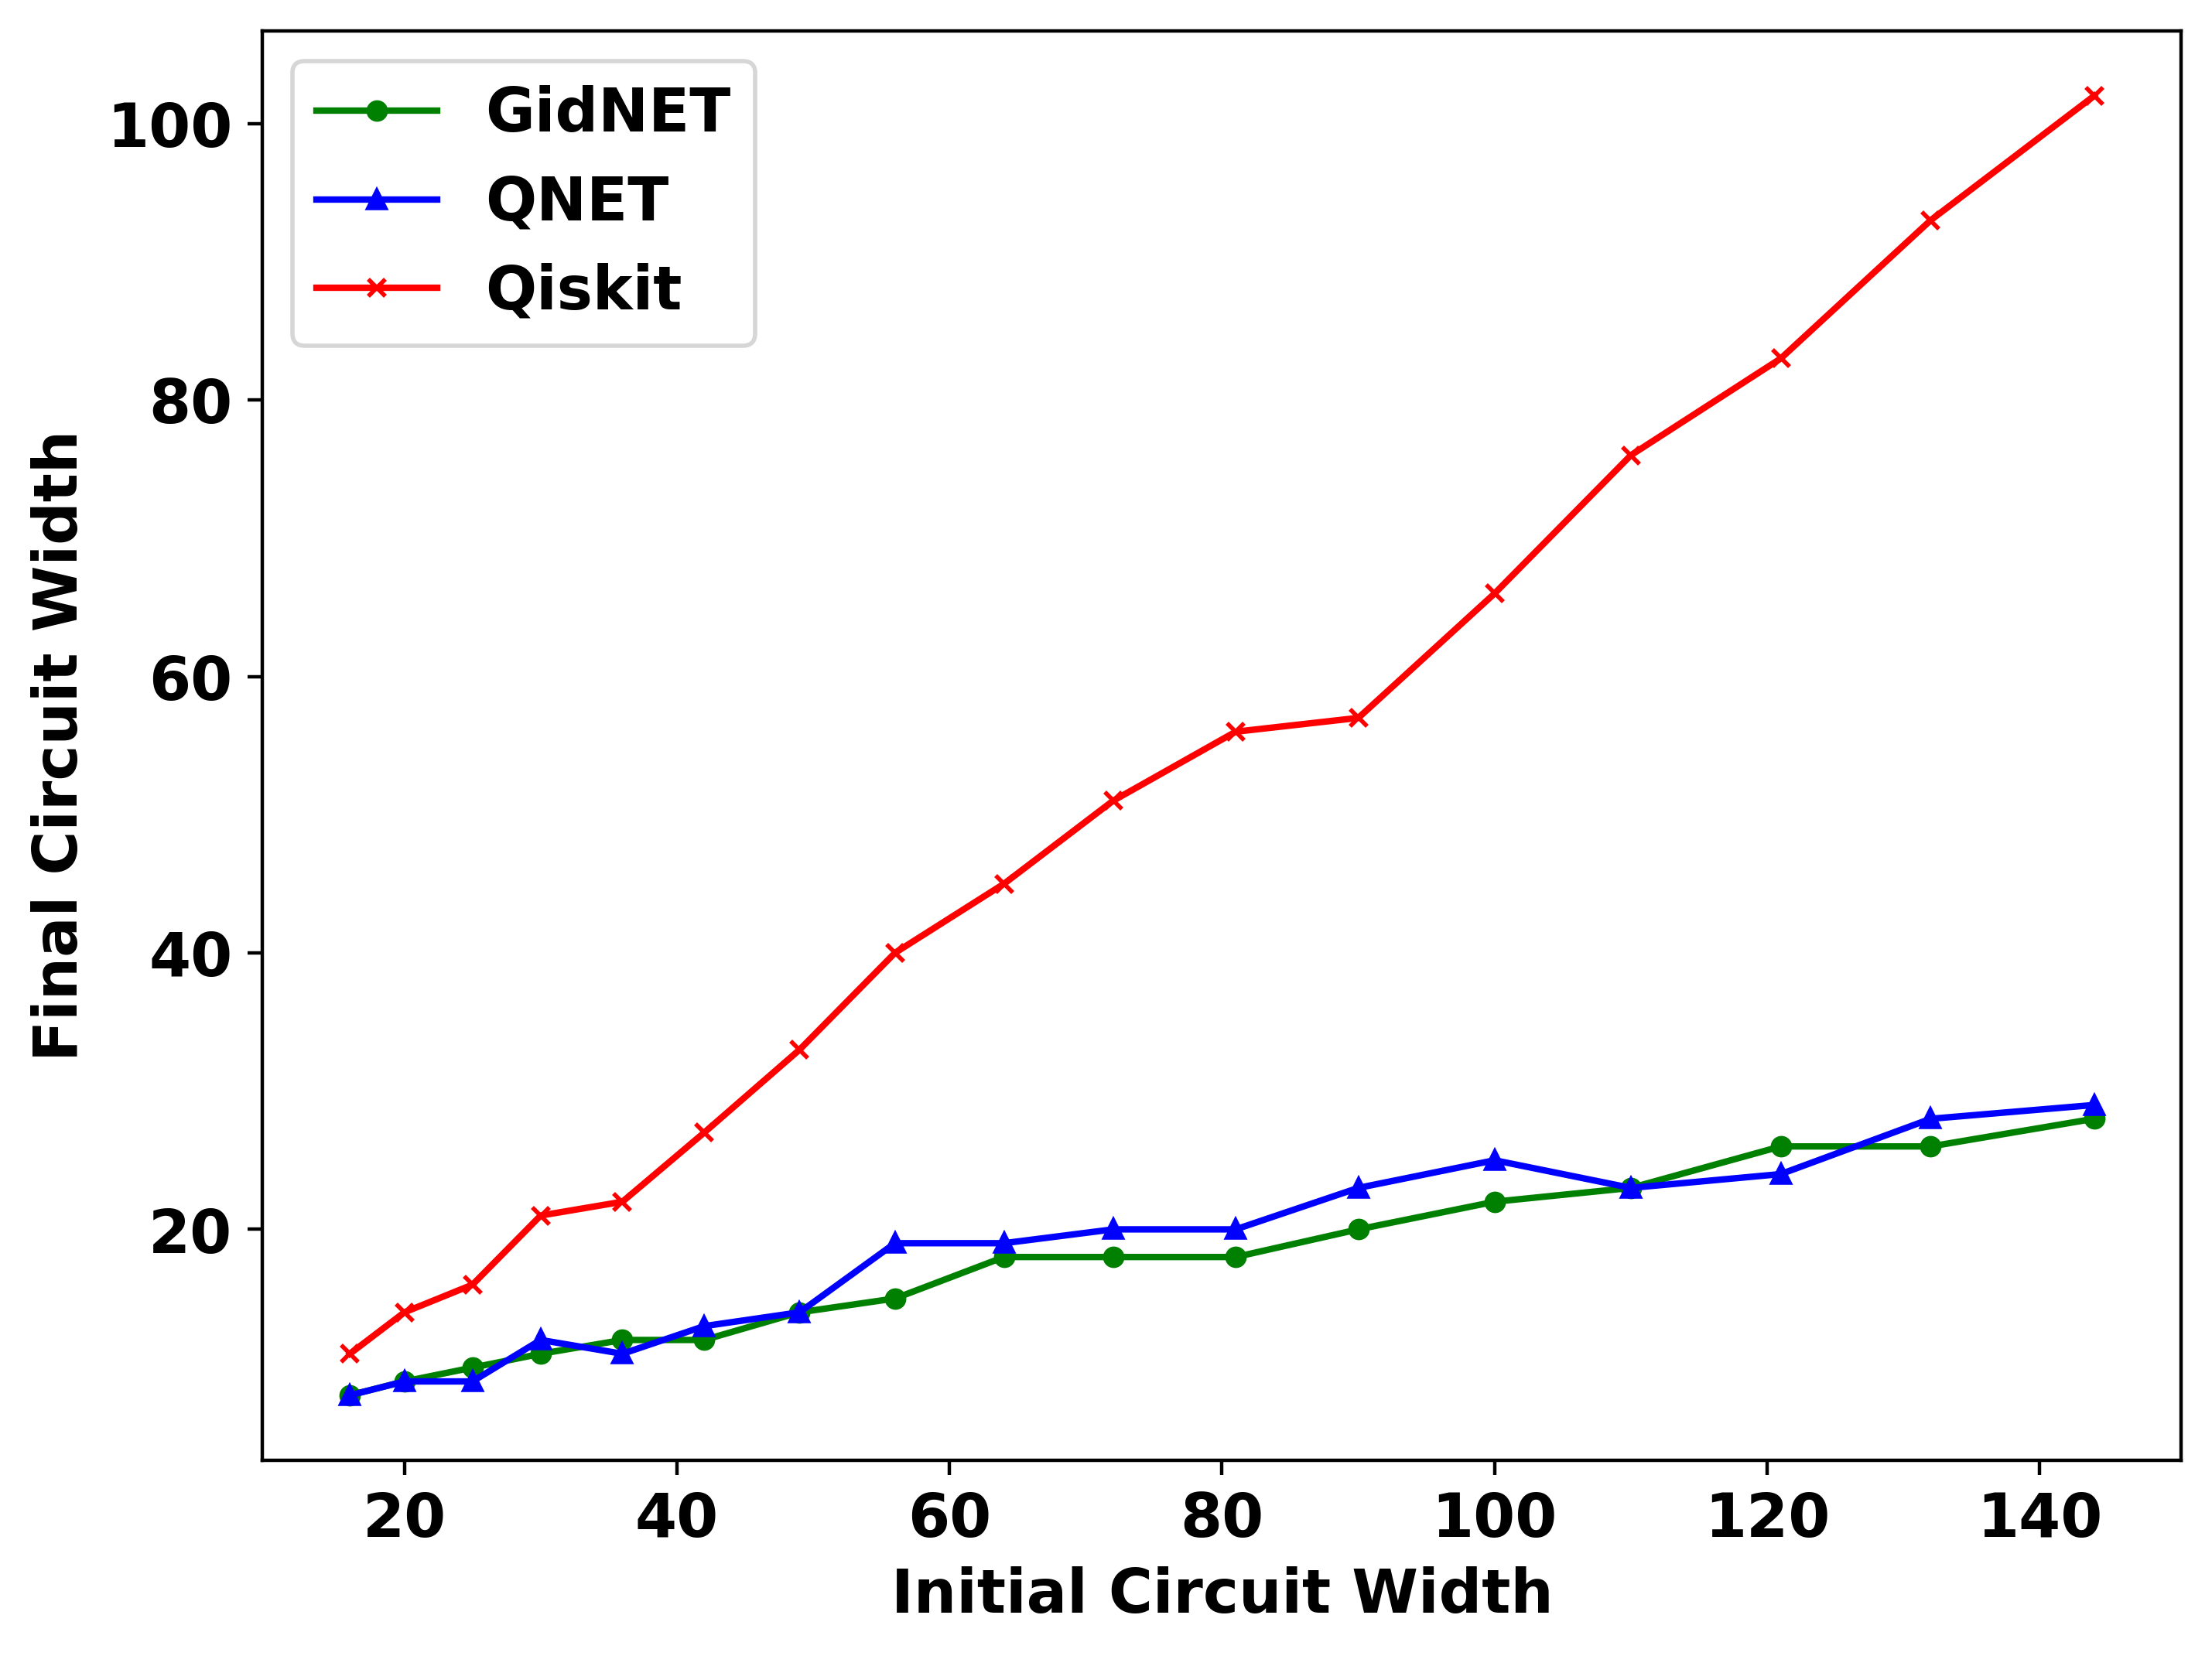

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv'
df = pd.read_csv(data_path)

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for deterministic method
plt.plot(df["Circuit Sizes"], df["GidNET Width"], label='GidNET', marker='o', color="green", linestyle='-', markersize=4)

# Plot for QNET
plt.plot(df["Circuit Sizes"], df["QNET Width"], label='QNET', marker='^', color="blue", linestyle='-', markersize=4)

# Plot for random method (Qiskit)
plt.plot(df["Circuit Sizes"], df["Qiskit Width"], label='Qiskit', marker='x', color="red", linestyle='-', markersize=4)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Qubit Reuse \n Algorithms for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Final Circuit Width', fontsize=14, fontweight='bold')
plt.legend(prop={'size': 14, 'weight': 'bold'})

plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

# Optionally uncomment to enable grid
# plt.grid(True)

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_cutqc_supremacy_cct/GidNET_v02_QNET_and_Qiskit_cutqc_supremacy_initial_vs_final_circuit_width_lineplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


/tmp/ipykernel_57714/3249892952.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
/tmp/ipykernel_57714/3249892952.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-^" (-> marker='^'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
/tmp/ipykernel_57714/3249892952.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-x" (-> marker='x'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Run

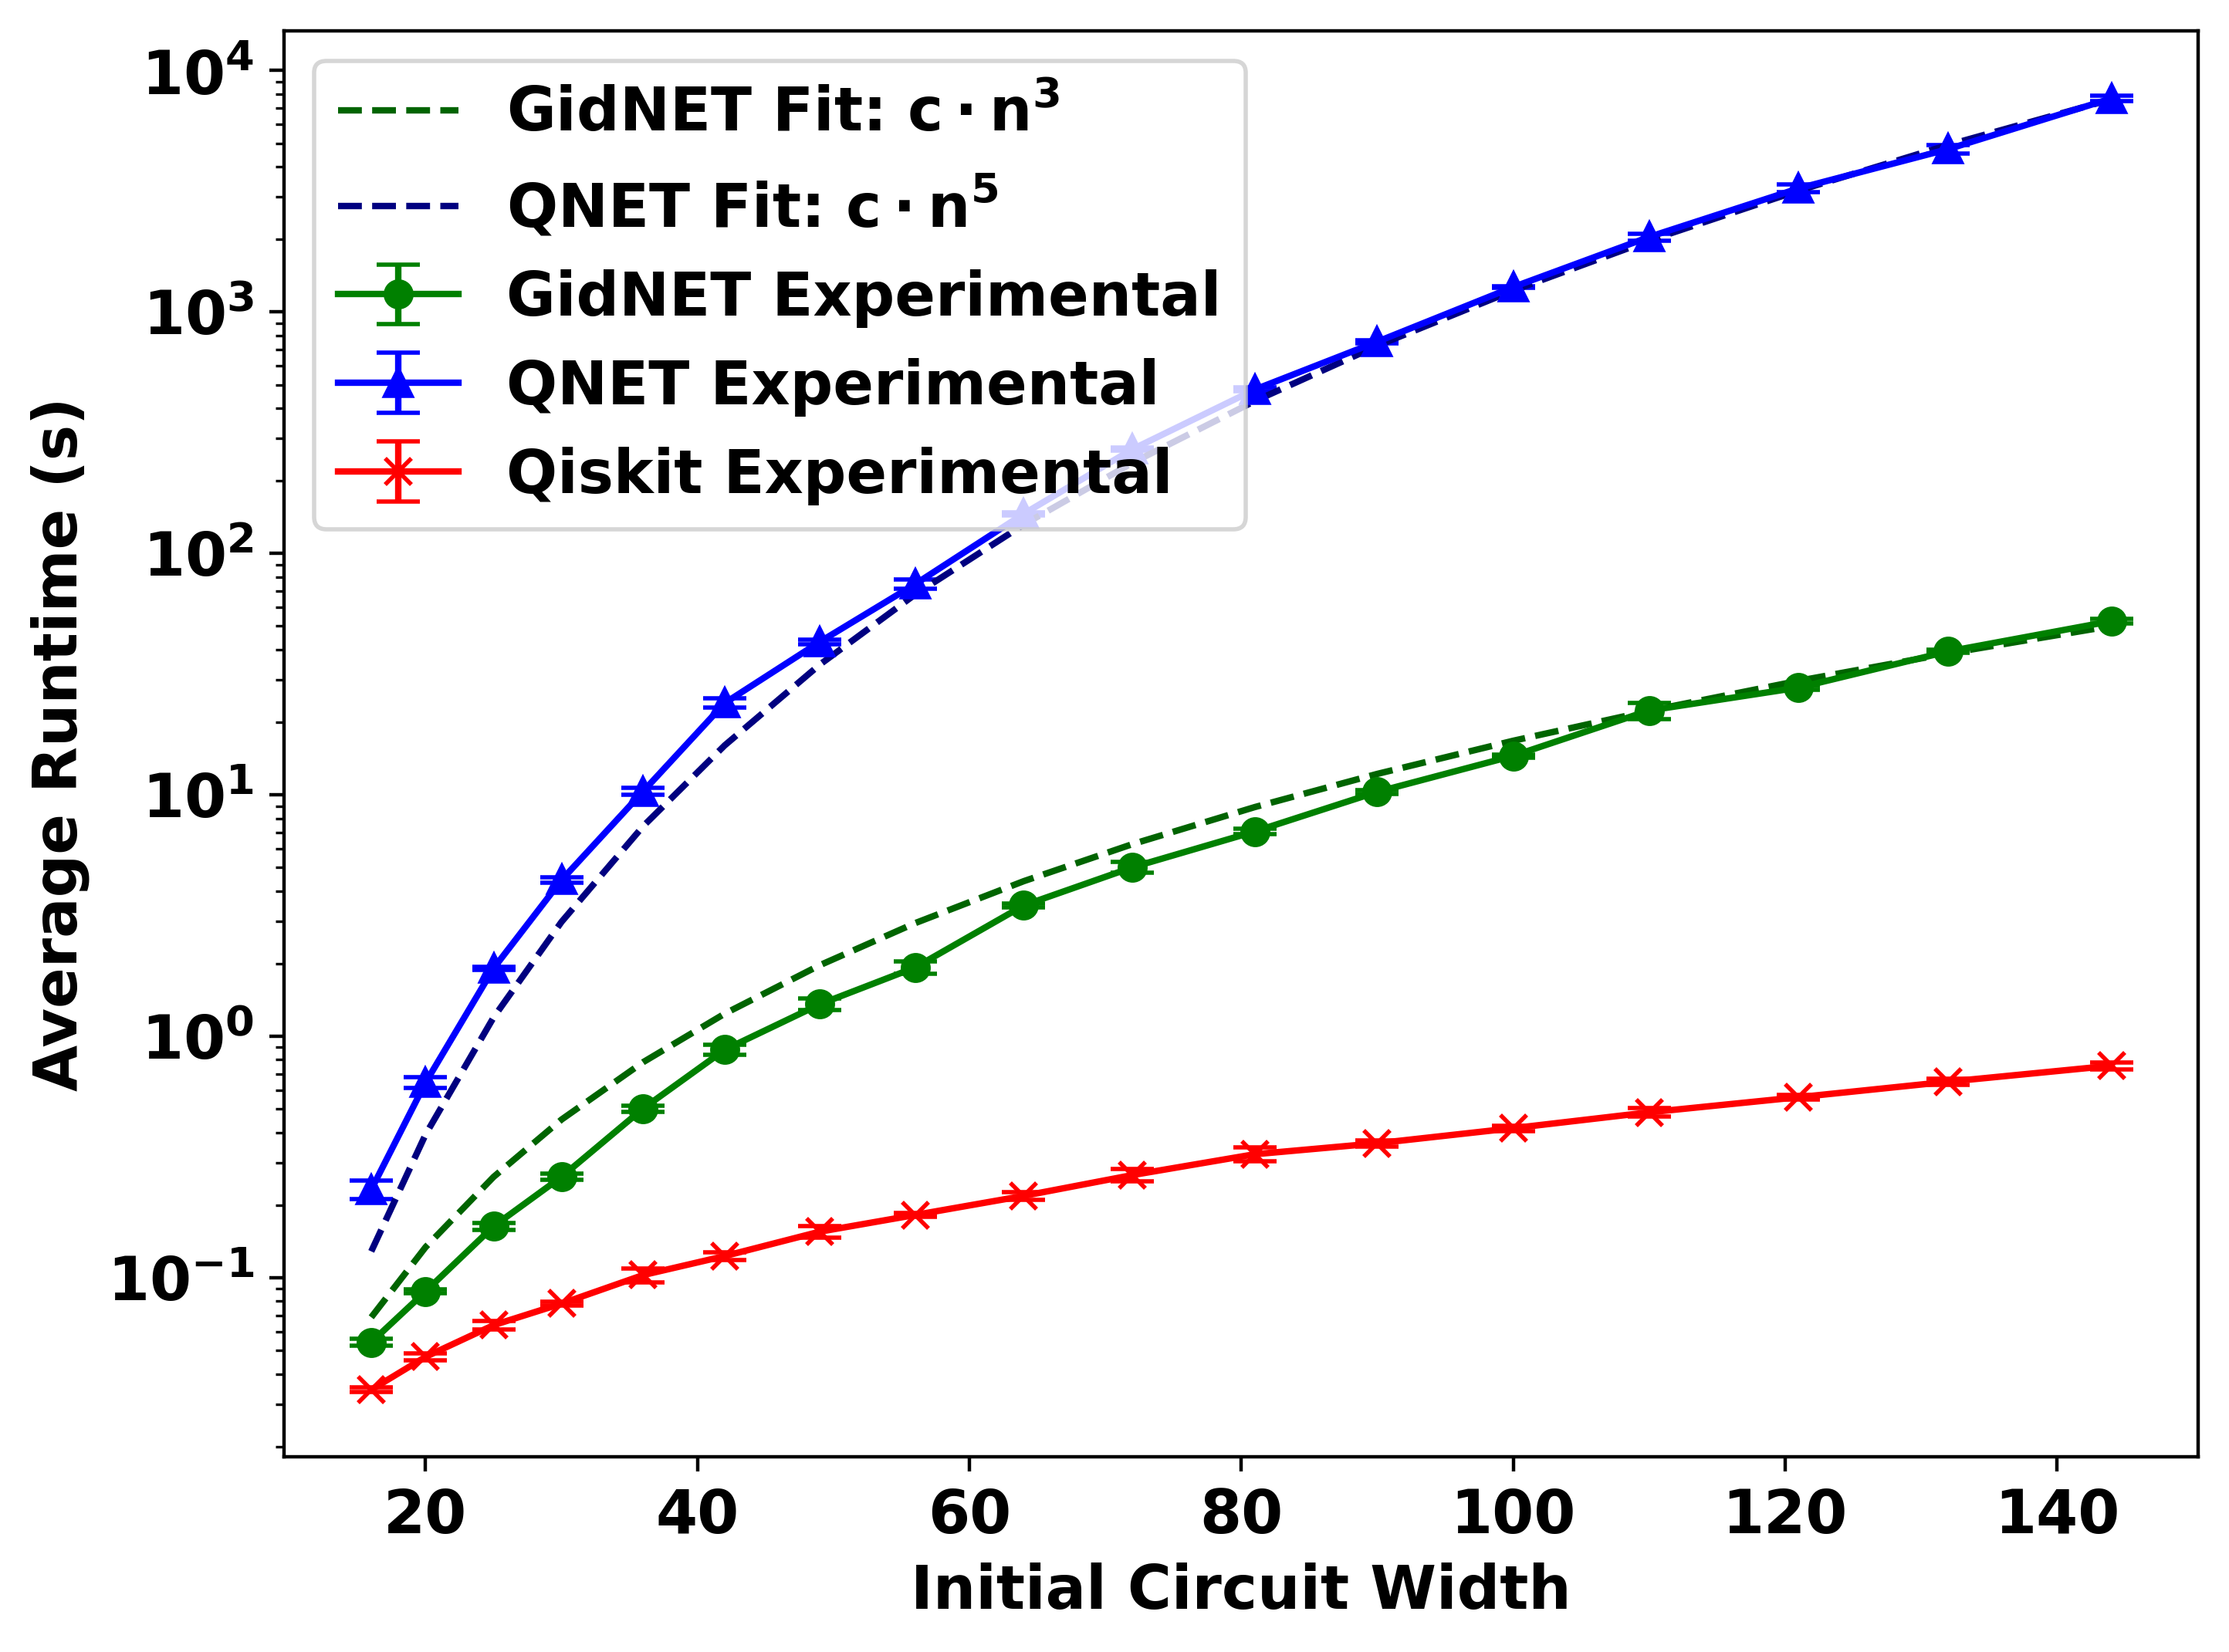

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv'
df = pd.read_csv(data_path)

# Define model functions
def model_gidnet(n, c):
    return c * n**3

def model_qnet(n, c):
    return c * n**5

# Curve fitting for GidNET and QNET
popt_gidnet, _ = curve_fit(model_gidnet, df["Circuit Sizes"], df["GidNET Average Runtime"])
popt_qnet, _ = curve_fit(model_qnet, df["Circuit Sizes"], df["QNET Average Runtime"])

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for GidNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
plt.plot(df["Circuit Sizes"], model_gidnet(df["Circuit Sizes"], *popt_gidnet), color="darkgreen", linestyle='--', label=r'GidNET Fit: $\mathbf{c \cdot n^3}$')

# Plot for QNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
plt.plot(df["Circuit Sizes"], model_qnet(df["Circuit Sizes"], *popt_qnet), color="navy", linestyle='--', label=r'QNET Fit: $\mathbf{c \cdot n^5}$')

# Plot for Qiskit with error bars only (no fit)
plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Runtime"], yerr=df["Qiskit Stdev Runtime"], label='Qiskit Experimental', marker='x', color="red", fmt='-x', capsize=5)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Average Runtime \n for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Average Runtime (s)', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.legend(prop={'size': 14, 'weight': 'bold'})

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_cutqc_supremacy_cct/GidNET_v02_QNET_and_Qiskit_cutqc_supremacy_initial_circuit_width_vs_average_runtime_logplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


### F-test and R-squared values

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_gidnet(df["Circuit Sizes"], *popt_gidnet))
experimental_values = np.array(df["GidNET Average Runtime"])

# Fit the polynomial regression
degree=3
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)


R-squared value: 0.9989575499955387
F-statistic: 2874.835855111489


In [ ]:
n=4
R-squared value: 0.9989617396275322
F-statistic: 2116.728987697878

In [78]:
# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_qnet(df["Circuit Sizes"], *popt_qnet))
experimental_values = np.array(df["QNET Average Runtime"])


# Fit the polynomial regression
degree=5
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)

R-squared value: 0.9995528400805823
F-statistic: 3725.5606502115834


In [99]:
data

,Circuit Sizes,GidNET Average Runtime,GidNET Stdev Runtime,GidNET Width,QNET Average Runtime,QNET Stdev Runtime,QNET Width,Qiskit Average Runtime,Qiskit Stdev Runtime,Qiskit Width
0,16,0.054118,0.001662,8,0.232042,0.020646,8,0.034403,0.000699,11
1,20,0.087888,0.001434,9,0.644203,0.032511,9,0.047088,0.001515,14
2,25,0.163495,0.005500,10,1.913570,0.034046,9,0.063693,0.002517,16
3,30,0.261959,0.007779,11,4.442569,0.116289,12,0.078211,0.001687,21
4,36,0.502674,0.014305,12,10.344221,0.343988,11,0.102692,0.006834,22
5,42,0.880157,0.042355,12,24.005156,1.056985,13,0.123056,0.004165,27
6,49,1.358781,0.072060,14,43.060713,1.047464,14,0.155348,0.008213,33
7,56,1.928320,0.111255,15,74.570417,3.272120,19,0.182108,0.003301,40
8,64,3.486160,0.055450,18,146.020070,1.985528,19,0.218533,0.007662,45
9,72,5.015760,0.268074,18,270.305784,4.202904,20,0.266496,0.015780,51


In [81]:
# Load the data
# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv'
data = pd.read_csv(data_path)

# Calculate the percentage reduction in average runtime
runtime_reduction_vs_qnet = (1 - data['GidNET Average Runtime'] / data['QNET Average Runtime']) * 100
runtime_reduction_vs_qiskit = (1 - data['Qiskit Average Runtime'] / data['GidNET Average Runtime']) * 100

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame
performance_improvement = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement


,Circuit Sizes,Runtime Reduction vs QNET (%),Runtime Reduction vs Qiskit (%),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,76.677379,36.429906,0.000000,27.272727
1,20,86.357158,46.422394,0.000000,35.714286
2,25,91.456009,61.042653,-11.111111,37.500000
3,30,94.103426,70.143782,8.333333,47.619048
4,36,95.140537,79.570770,-9.090909,45.454545
5,42,96.333467,86.018883,7.692308,55.555556
6,49,96.844499,88.567135,0.000000,57.575758
7,56,97.414095,90.556150,21.052632,62.500000
8,64,97.612548,93.731425,5.263158,60.000000
9,72,98.144413,94.686821,10.000000,64.705882


In [85]:
performance_improvement["Runtime Reduction vs QNET (%)"].mean()

95.44880414838622

In [86]:
performance_improvement["Runtime Reduction vs Qiskit (%)"].mean()

84.05367199899833

In [88]:
# Load the data
# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv'
data = pd.read_csv(data_path)

# Calculate how many X faster
runtime_reduction_vs_qnet = (data['QNET Average Runtime'] / data['GidNET Average Runtime'])
runtime_reduction_vs_qiskit = (data['GidNET Average Runtime'] / data['Qiskit Average Runtime'])

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame with corrected values
performance_improvement_corrected = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (x)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (x)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement_corrected


,Circuit Sizes,Runtime Reduction vs QNET (x),Runtime Reduction vs Qiskit (x),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,4.287683,1.573067,0.000000,27.272727
1,20,7.329851,1.866451,0.000000,35.714286
2,25,11.704132,2.566910,-11.111111,37.500000
3,30,16.959001,3.349386,8.333333,47.619048
4,36,20.578407,4.894947,-9.090909,45.454545
5,42,27.273720,7.152504,7.692308,55.555556
6,49,31.690692,8.746714,0.000000,57.575758
7,56,38.671184,10.588902,21.052632,62.500000
8,64,41.885651,15.952589,5.263158,60.000000
9,72,53.891291,18.821125,10.000000,64.705882


In [89]:
performance_improvement_corrected["Runtime Reduction vs QNET (x)"].mean()

56.30532267249479

In [98]:
# np.sum(performance_improvement_corrected["Runtime Reduction vs QNET (x)"])/17

In [90]:
performance_improvement_corrected["Runtime Reduction vs Qiskit (x)"].mean()

22.723991611628815

In [91]:
performance_improvement_corrected["Width Reduction vs QNET (%)"].mean()

4.084746366456905

In [92]:
performance_improvement_corrected["Width Reduction vs Qiskit (%)"].mean()

57.43161547243526

In [93]:
# Calculate the average improvement of GidNET over QNET and Qiskit in terms of runtime
gidnet_faster_than_qnet = (data['QNET Average Runtime'] - data['GidNET Average Runtime']) / data['QNET Average Runtime']
# gidnet_faster_than_qiskit = (data['Qiskit Average Runtime'] - data['GidNET Average Runtime']) / data['Qiskit Average Runtime']
# Calculate how much faster Qiskit is compared to GidNET in percentage terms
qiskit_faster_than_gidnet = (data['GidNET Average Runtime'] - data['Qiskit Average Runtime']) / data['GidNET Average Runtime']



average_improvement_qnet = gidnet_faster_than_qnet.mean() * 100
# average_improvement_qiskit = gidnet_faster_than_qiskit.mean() * 100
average_faster_qiskit = qiskit_faster_than_gidnet.mean() * 100

average_improvement_qnet, average_faster_qiskit


(95.44880414838622, 84.05367199899834)

In [94]:
# Re-load the data from the newly provided file path and calculate the circuit width differences
# file_path_new = '/mnt/data/combined_width_and_runtime_cutqc_supremacy_data.csv'
# data_new = pd.read_csv(file_path_new)

# Calculate the percentage improvements in circuit width for GidNET compared to QNET and Qiskit
gidnet_better_than_qnet_width_new = ((data['QNET Width'] - data['GidNET Width']) / data['QNET Width']) 
gidnet_better_than_qiskit_width_new = ((data['Qiskit Width'] - data['GidNET Width']) / data['Qiskit Width']) 

average_better_width_qnet_new = gidnet_better_than_qnet_width_new.mean() * 100
average_better_width_qiskit_new = gidnet_better_than_qiskit_width_new.mean() * 100

average_better_width_qnet_new, average_better_width_qiskit_new


(4.084746366456904, 57.43161547243526)